In [7]:
from utils import * 
from algorithms import *
from agents import *

In [8]:
numRounds, numPeriods, numSteps = 1, 15000, 10
numBuyers, numSellers, numTokens = 4, 4, 4
gameTypes, seed = '1111', 42
disclosure = []
depth = 0
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = 0
numStates = 1
numActions = 20
epsilon = 0.99
min_epsilon = 0.05
epsilon_decay = 0.99995
alpha = 0.1
gamma = 0.99
buyers = [Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, algo = 'QL',
                     algoArgs = [numStates, numActions, epsilon, min_epsilon, epsilon_decay, alpha, gamma]),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [9]:
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    print(log.roundData.buyerValues.item())
    print(log.roundData.sellerCosts.item())
    score = 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = [step, buyers[0].periodTrades]

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState = [step+1, buyers[0].periodTrades]
            if buyers[0].periodSteps == numSteps - 1:
                buyers[0].done = True
            else:
                buyers[0].done = False

            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%500==0:
            print(score/500, buyers[0].algo.epsilon)
            score = 0.0
    endRounds(buyers, sellers)

[[85.82202637 81.73001813 81.63077519 77.98802756]
 [86.00286066 81.75851481 77.79014457 77.22312836]
 [83.24607464 78.75300079 77.92916939 77.73215368]
 [81.78455651 76.72373723 71.09604113 70.44124563]]
[[42.84624139 45.55309494 45.88317457 51.95146854]
 [40.61548525 47.08281665 48.26232262 56.1070403 ]
 [42.80119778 46.68836691 49.39779518 50.24920035]
 [47.07267989 47.93213437 48.90976077 59.15714846]]
0.13887616570439262 0.9895051113601513
57.57512628302751 0.7706225390139936
59.540396763652936 0.6001576857142933
61.36429449042886 0.4674003542419011
60.79795186476836 0.3640094867492138
60.09243649534577 0.2834891014542307
62.9387796349964 0.22078015427849532
63.892151798440594 0.17194268235777638
65.71241640852321 0.13390825870650658
67.85020884324695 0.10428720492156332
68.3349302221774 0.08121844922342865
69.24666858109438 0.06325259651191142
70.64284200323166 0.0499978647437282
71.29642808868238 0.0499978647437282
72.00930617926696 0.0499978647437282
72.35293672821443 0.0499978

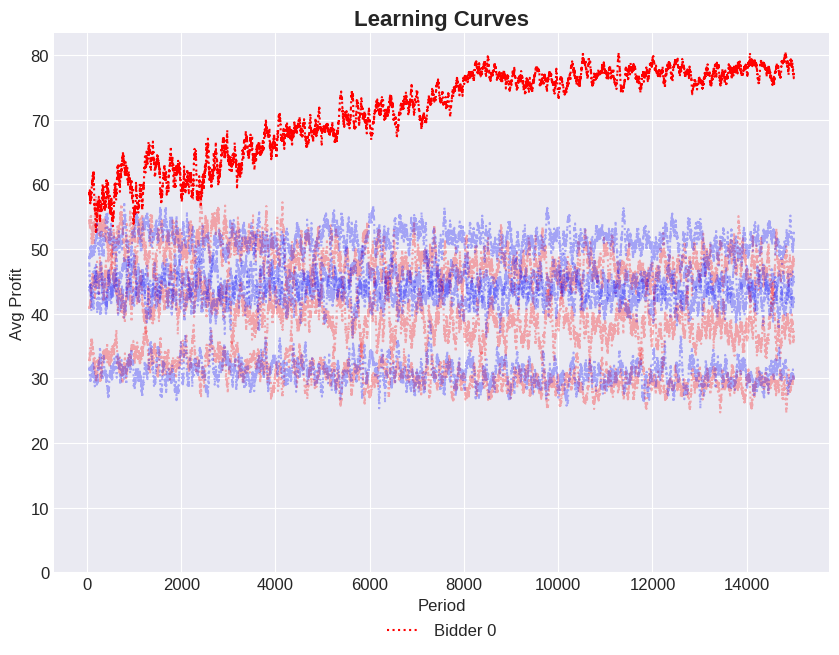

In [14]:
log.graphLearning(rolling_window = 50, trackBuyersIdx=[0], trackSellersIdx=[])

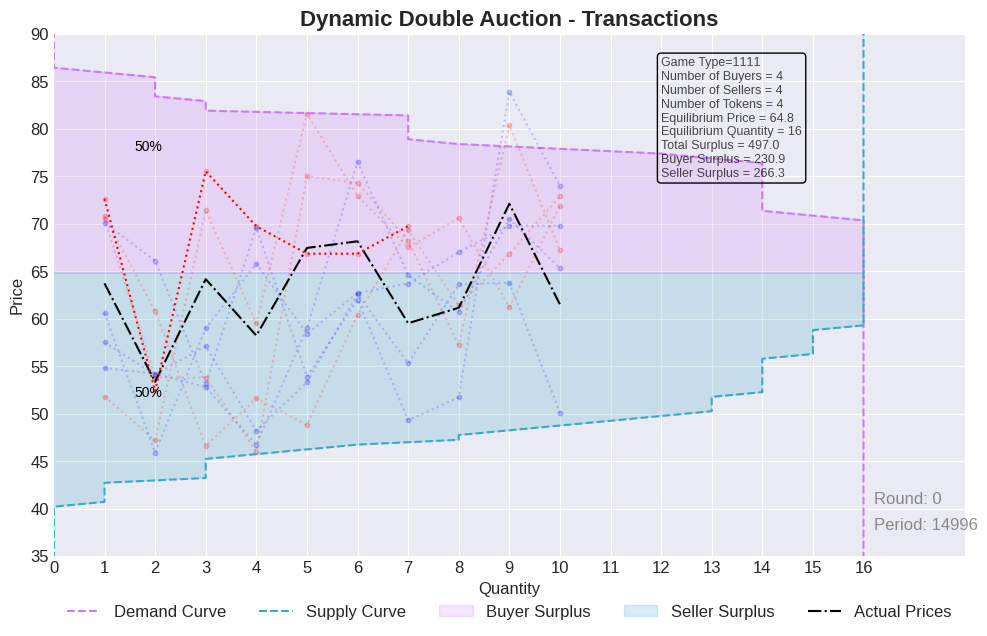

In [29]:
log.graphSales(0, period-3, trackBuyersIdx=[0], trackSellersIdx=[])

In [16]:
log.stepData.tail(20)

,rnd,period,step,bids,asks,currentBid,currentBidIdx,currentAsk,currentAskIdx,buy,sell,price,sale,bprofit,sprofit
149980,0,14998,0,"[72.63157894736841, 51.8, 81.9, 51.6]","[58.8, 42.8, 58.9, 57.5]",81.900000,2,42.8,1,True,True,62.350000,True,20.896075,21.734515
149981,0,14998,1,"[75.52631578947368, 83.5, 60.0, 57.1]","[63.7, 64.1, 49.9, 53.5]",83.500000,1,49.9,2,True,True,66.700000,True,19.302861,23.898802
149982,0,14998,2,"[75.52631578947368, 78.7, 53.5, 68.1]","[53.2, 65.3, 61.8, 70.2]",78.700000,1,53.2,0,True,True,65.950000,True,15.808515,23.103759
149983,0,14998,3,"[78.42105263157895, 40.6, 73.4, 42.7]","[50.9, 58.2, 55.4, 56.4]",78.421053,0,50.9,0,True,True,64.660526,True,21.161500,19.107431
149984,0,14998,4,"[75.52631578947368, 75.4, 67.0, 67.4]","[68.3, 67.6, 63.4, 64.2]",75.526316,0,63.4,2,True,True,69.463158,True,12.266860,22.774791
149985,0,14998,5,"[72.63157894736841, 74.2, 54.3, 42.0]","[51.9, 57.6, 73.5, 66.4]",74.200000,1,51.9,0,True,True,63.050000,True,14.740145,17.166825
149986,0,14998,6,"[75.52631578947368, 51.8, 77.9, 54.0]","[54.5, 50.5, 72.0, 69.3]",77.900000,2,50.5,1,True,True,64.200000,True,14.553001,17.117183
149987,0,14998,7,"[78.42105263157895, 49.7, 55.2, 75.2]","[52.5, 61.3, 61.5, 70.4]",78.421053,0,52.5,0,True,True,65.460526,True,16.170249,13.509058
149988,0,14998,8,"[78.42105263157895, 59.1, 43.7, 67.7]","[nan, 55.0, 68.4, 57.8]",78.421053,0,55.0,1,True,True,66.710526,True,11.277501,18.448204
149989,0,14998,9,"[nan, 45.6, 73.9, 57.0]","[nan, 59.0, 49.9, 56.9]",73.900000,2,49.9,2,True,True,61.900000,True,16.029169,12.502205


In [24]:
print(log.stepData.tail(500)[['currentBidIdx', 'bprofit']].groupby('currentBidIdx').sum())

                   bprofit
currentBidIdx             
0              3824.189731
1              2441.313826
2              1720.363349
3              1401.504226


In [23]:
print(log.stepData.head(500)[['currentBidIdx', 'bprofit']].groupby('currentBidIdx').sum())

                   bprofit
currentBidIdx             
0              2943.474938
1              2690.819612
2              2051.333934
3              1592.885200


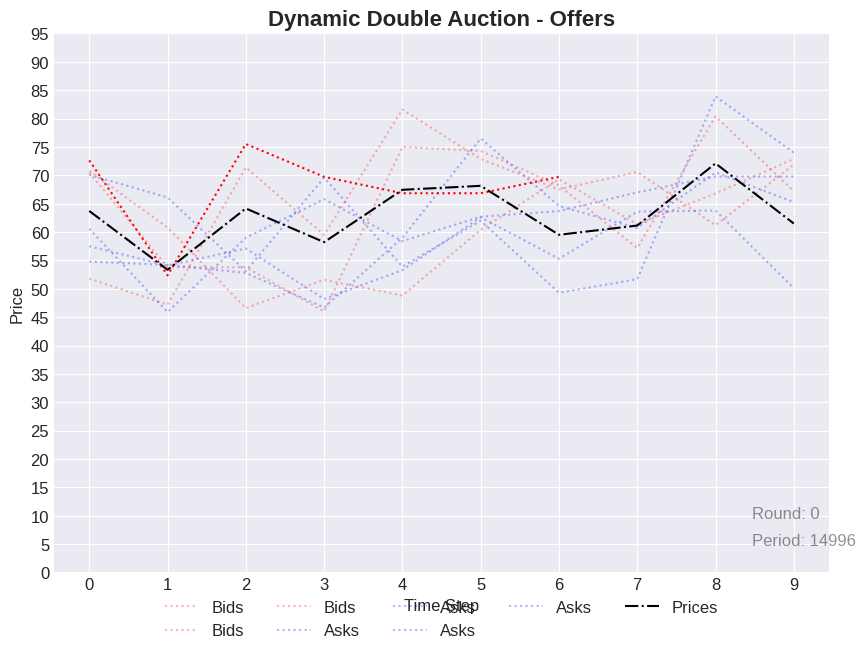

In [28]:
log.graphOffers(0, period-3, trackBuyersIdx=[0], trackSellersIdx=[])

In [54]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/50), trackBuyersIdx = [0])

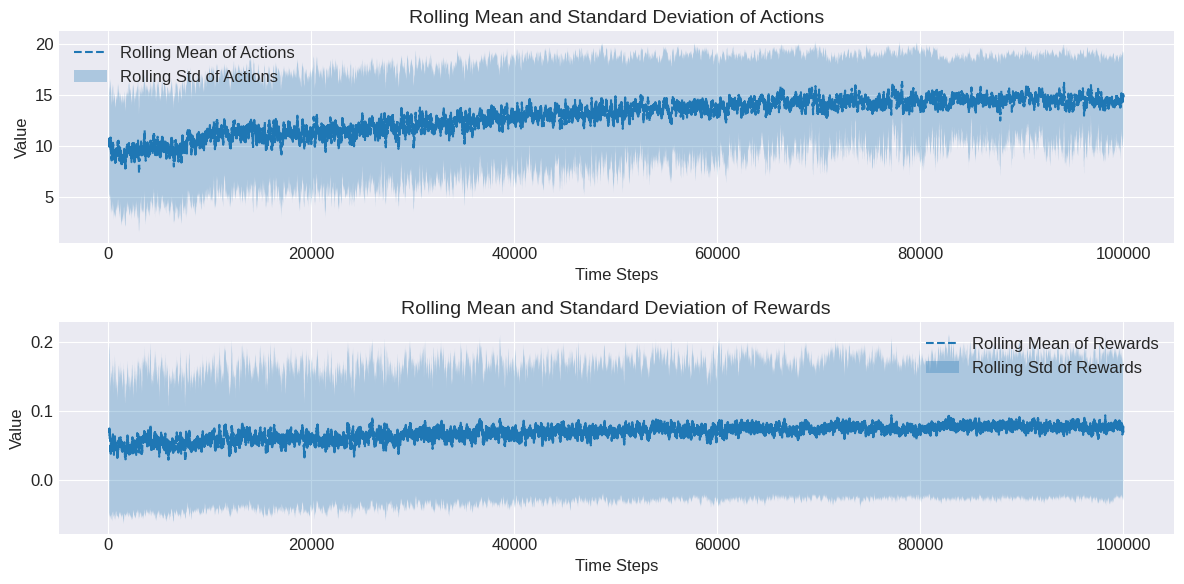

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'memory' contains your data
memory = pd.DataFrame(buyers[0].algo.memory, columns=['state', 'action', 'reward', 'newState', 'done'])

# Calculate the rolling mean and standard deviation for actions and rewards
window_size = 100  # You can adjust the window size as needed
rolling_action_mean = memory['action'].rolling(window=window_size).mean()
rolling_reward_mean = memory['reward'].rolling(window=window_size).mean()
rolling_action_std = memory['action'].rolling(window=window_size).std()
rolling_reward_std = memory['reward'].rolling(window=window_size).std()

# Plot the rolling means and standard deviations separately for actions and rewards
plt.figure(figsize=(12, 6))

# Plot Rolling Mean and Std for Actions
plt.subplot(2, 1, 1)
plt.plot(rolling_action_mean, label='Rolling Mean of Actions')
plt.fill_between(
    range(len(memory)),
    rolling_action_mean - rolling_action_std,
    rolling_action_mean + rolling_action_std,
    alpha=0.3,
    label='Rolling Std of Actions'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Actions')

# Plot Rolling Mean and Std for Rewards
plt.subplot(2, 1, 2)
plt.plot(rolling_reward_mean, label='Rolling Mean of Rewards')
plt.fill_between(
    range(len(memory)),
    rolling_reward_mean - rolling_reward_std,
    rolling_reward_mean + rolling_reward_std,
    alpha=0.3,
    label='Rolling Std of Rewards'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Rewards')

plt.tight_layout()
plt.show()
